In [10]:
import glob
import numpy as np
import cv2
import pylab as plt
import os

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np
import argparse
from os.path import isfile


## Preparing dataset

In [3]:

k = glob.glob('./images/*')
cat_ims = [len(glob.glob(i+'/*.jpg')) for i in k]

In [4]:
cats = [i.split('/')[2] for i in k]
cats

['potted plant',
 'sink',
 'fork',
 'stop sign',
 'car',
 'toilet',
 'laptop',
 'clock',
 'mouse',
 'knife',
 'chair',
 'oven',
 'bottle',
 'tv',
 'keyboard',
 'microwave',
 'bowl',
 'cup']

In [5]:
data_dict = dict()
for i,j in zip(cats,cat_ims):
    data_dict[i] = j

In [6]:
data_dict

{'potted plant': 154,
 'sink': 279,
 'fork': 230,
 'stop sign': 126,
 'car': 104,
 'toilet': 158,
 'laptop': 123,
 'clock': 119,
 'mouse': 109,
 'knife': 141,
 'chair': 253,
 'oven': 101,
 'bottle': 166,
 'tv': 281,
 'keyboard': 184,
 'microwave': 156,
 'bowl': 141,
 'cup': 276}

In [7]:
import json
 
# Opening JSON file
f = open('coco_search18_fixations_TP_train_split1.json','r')
f1= open('coco_search18_fixations_TP_validation_split1.json','r')
f2= open('coco_search18_fixations_TP_validation_split2.json','r')
f3 = open('coco_search18_fixations_TP_train_split2.json','r')
f4 = open('coco_search18_fixations_TP_test.json','r')

data = json.load(f)

for i in json.load(f1):
    data.append(i)
for i in json.load(f2):
    data.append(i)
for i in json.load(f3):
    data.append(i)
for i in json.load(f4):
    data.append(i)


In [8]:
data[0]

{'name': '000000478726.jpg',
 'subject': 2,
 'task': 'bottle',
 'condition': 'present',
 'bbox': [1063, 68, 95, 334],
 'X': [848.2, 799.2, 731.1, 1114.4, 1121.5],
 'Y': [517.2, 476.2, 383.4, 271.1, 205.9],
 'T': [73, 193, 95, 635, 592],
 'length': 5,
 'correct': 1,
 'RT': 1159,
 'split': 'train'}

In [9]:
dataset_dir = './images'

(1050, 1680, 3)

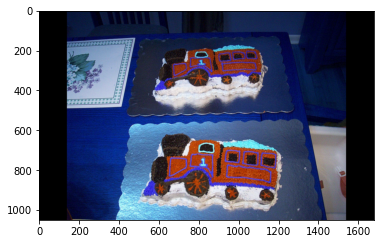

In [10]:

i=234
path = dataset_dir +'/'+ data[i]['task'] +'/'+ data[i]['name']
x=cv2.imread(path)
plt.imshow(x)
x.shape

In [11]:
def convert_coordinate(X, Y, im_w, im_h):
    """
    convert from display coordinate to pixel coordinate

    X - x coordinate of the fixations
    Y - y coordinate of the fixations
    im_w - image width
    im_h - image height
    """
    display_w, display_h = 1680, 1050
    target_ratio = display_w / float(display_h)
    ratio = im_w / float(im_h)

    delta_w, delta_h = 0, 0
    if ratio > target_ratio:
        new_w = display_w
        new_h = int(new_w / ratio)
        delta_h = display_h - new_h
    else:
        new_h = display_h
        new_w = int(new_h * ratio)
        delta_w = display_w - new_w
    dif_ux = delta_w // 2
    dif_uy = delta_h // 2
    scale = im_w / float(new_w)
    X = (X - dif_ux) * scale
    Y = (Y - dif_uy) * scale
    return X, Y


def plot_scanpath(img, xs, ys, ts, bbox=None, title=None):
    fig, ax = plt.subplots()
    ax.imshow(img)
    cir_rad_min, cir_rad_max = 30, 60
    min_T, max_T = np.min(ts), np.max(ts)
    rad_per_T = (cir_rad_max - cir_rad_min) / float(max_T - min_T)

    for i in range(len(xs)):
        if i > 0:
            plt.arrow(xs[i - 1], ys[i - 1], xs[i] - xs[i - 1],
                      ys[i] - ys[i - 1], width=3, color='yellow', alpha=0.5)

    for i in range(len(xs)):
        cir_rad = int(25 + rad_per_T * (ts[i] - min_T))
        circle = plt.Circle((xs[i], ys[i]),
                            radius=cir_rad,
                            edgecolor='red',
                            facecolor='yellow',
                            alpha=0.5)
        ax.add_patch(circle)
        plt.annotate("{}".format(
            i+1), xy=(xs[i], ys[i]+3), fontsize=10, ha="center", va="center")

    if bbox is not None:
        rect = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], 
            alpha=0.5, edgecolor='yellow', facecolor='none', linewidth=2)
        ax.add_patch(rect)

    ax.axis('off')
    if title is not None:
        ax.set_title(title)
    plt.show()



/home/siddharth/miniconda3/envs/vis/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


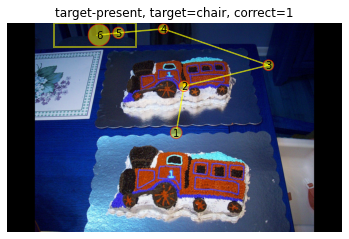

(1050, 1680, 3)


In [12]:
bbox = data[i]['bbox']
# convert fixations from display coordinate to pixel coordinate
X, Y = np.array(data[i]['X']).astype(
    np.float), np.array(data[i]['Y']).astype(np.float)
# X, Y = convert_coordinate(X, Y, im_w, im_h)
T = np.array(data[i]['T']).astype(np.int32)
cat_name = data[i]['task']
title = "target-{}, target={}, correct={}".format(
    data[i]['condition'], cat_name, data[i]['correct'])
# title= 'plot'
path = dataset_dir +'/'+ data[i]['task'] +'/'+ data[i]['name']
# plot_scanpath
plot_scanpath(cv2.imread(path), X, Y, T, bbox, title)
print(cv2.imread(path).shape)

In [13]:
stimuli = dict()
targets = dict()
bboxes = dict()

In [14]:
d=dict()
for i in data:
    d[i['task']]=dict()

In [15]:
for i in data:
    d[i['task']][i['name']]= i['bbox']

In [16]:
d.keys()

dict_keys(['bottle', 'chair', 'cup', 'fork', 'laptop', 'microwave', 'sink', 'stop sign', 'toilet', 'tv', 'bowl', 'car', 'clock', 'keyboard', 'knife', 'mouse', 'oven', 'potted plant'])

Code below is RAM intensive since we are saving the stimulus and target image dictionaries for future convenience as .pkl files, hence we are first loading it all  into RAM (~20 Gigs). In the future we will add a much simpler script which makes calls only to the disk

In [31]:
# path = dataset_dir +'/'+ data[i]['task'] +'/'+ data[i]['name']
# def run(d,stimuli,targets,bboxes):
for i in d.keys():
    c=0
    
    stimuli[i] = []
    targets[i]=[]
    bboxes[i] = []
    for k,v in d[i].items():
        c+=1
        path = os.path.join(dataset_dir,i,k)
        im = cv2.imread(path)
        bbox = v
        if (c<len(d[i].keys())//2):
            stimuli[i].append(im[bbox[1]:bbox[1]+bbox[3],bbox[0]:bbox[0]+bbox[2],:])
        else:
            targets[i].append(im)
            bboxes[i].append(v)

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9


In [32]:
import pickle
pickle.dump(stimuli,open('./croppedims.pkl','wb'))
pickle.dump(targets,open('./targetims.pkl','wb'))


In [33]:
pickle.dump(bboxes,open('./targetBBox.pkl','wb'))

## Dataset ready now using IVSN

In [34]:
import numpy as np
import  torch.nn.functional as F
import cv2
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import pickle

In [35]:
import torchvision.models as models
import torch
import torch.nn as nn


def replace_layers(model, old, new):
    for n, module in model.named_children():
        if len(list(module.children())) > 0:
            ## compound module, go inside it
            replace_layers(module, old, new)

        if isinstance(module, old):
            ## simple module
            try:
                n = int(n)
                model[n] = new
            except:
                setattr(model, n, new)


model_stim = models.vgg16(pretrained=True).features[:-1]
model_target = models.vgg16(pretrained=True).features
replace_layers(
    model_stim,
    nn.MaxPool2d,
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True),
)

replace_layers(
    model_target,
    nn.MaxPool2d,
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True),
)


In [36]:
TotalTrials = 600
targetsize = 28
stimulisize = 224

mean:tensor([0.4242, 0.3743, 0.3221])
std: tensor([0.2732, 0.2630, 0.2562])

In [37]:
transform_target = transforms.Compose(
    [transforms.ToTensor(), transforms.Resize((targetsize, targetsize)),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),transforms.ConvertImageDtype(torch.float)]
)

transform_source = transforms.Compose(
    [transforms.ToTensor(), transforms.Resize((stimulisize, stimulisize)),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),transforms.ConvertImageDtype(torch.float)]
)

# mean = torch.FloatTensor([103.939, 116.779, 123.68]).view(3, 1, 1)


def preprocess(img, name="src"):
    if name == "src":
        size = transform_source(img).size()
        return torch.unsqueeze(transform_source(img)*256,dim=0) #- mean.expand(size),
    else:
        size = transform_target(img).size()
        return torch.unsqueeze(transform_target(img)*256,dim=0) # - mean.expand(size),dim=0)



In [38]:
model_stim.cuda().eval()

model_target.cuda().eval()


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (17): Conv2d(256, 512, kernel_size=

In [39]:

target_ims = dict()

for i in targets.keys():
    target_ims[i]  = dict()
    for j,k in enumerate(targets[i]):
        with torch.no_grad():
            target_ims[i][j] = model_target(preprocess(k,'tar').cuda())

/home/siddharth/miniconda3/envs/vis/lib/python3.7/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [40]:
stim_ims = dict()

for i in stimuli.keys():
    stim_ims[i]  = dict()
    for j,k in enumerate(stimuli[i]):
        with torch.no_grad():
            stim_ims[i][j] = model_stim(preprocess(k,'src').cuda())

In [41]:
stack=dict()

In [42]:
for p,i in enumerate(stimuli.keys()):
    stack[i]=dict()

    for t,j in target_ims[i].items():
        for s,k in stim_ims[i].items():
            out_tens = F.conv2d(
                k,j, None, (1, 1), (1, 1)
            ) 
            out_tens = torch.squeeze(out_tens,dim=0)
            stack[i][(t,s)]=[]
            stack[i][(t,s)].append(out_tens.cpu().detach().numpy())
    if p%5 ==0:
        print(f'Done with {p} categories')


Done with 0 categories
Done with 5 categories
Done with 10 categories
Done with 15 categories


In [43]:
pickle.dump(stack,open('./att_maps_coco.pkl','wb'))

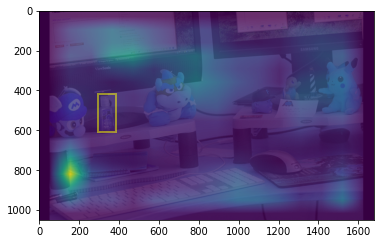

In [44]:
plt.figure()
ax = plt.gca()
s =33
plt.imshow(targets['bottle'][s])

plt.imshow(cv2.resize(np.array(stack['bottle'][(s,5)]).reshape(16,16),targets['bottle'][s].shape[:2]).T,cmap='viridis', alpha=0.8)
rect = Rectangle((bboxes['bottle'][s][0], bboxes['bottle'][s][1]),bboxes['bottle'][s][2],bboxes['bottle'][s][3], 
            alpha=0.5, edgecolor='yellow', facecolor='none', linewidth=2)
ax.add_patch(rect)


# scanpaths

In [2]:
import pylab as plt
import pickle
import copy
import cv2
import random
from tqdm.notebook import tqdm


In [3]:
att_maps = pickle.load(open('att_maps_coco.pkl','rb'))


In [4]:
target_ims = pickle.load(open('targetims.pkl','rb'))
stimuli_ims = pickle.load(open('croppedims.pkl','rb'))

In [5]:
bboxes = pickle.load(open('targetBBox.pkl','rb'))

In [6]:
def gray(img):
    img=np.array(img)
    return img/img.max().max()

In [7]:
def mask_fixation(img,x,y,size=20):
    img1 = copy.copy(img)
    img1[x-size:x+size,y-size:y+size]=0
    return img1

In [8]:
posx=dict()
scorematrix = dict()
posy=dict()


In [54]:
mask_sizes = np.arange(60,140,5)

In [55]:
mask_sizes
scores=[]

## Find optimum Mask size

In [56]:
for mask_size in mask_sizes: 
    for i in tqdm(stimuli_ims.keys()):
        # i = stimuli_ims.keys()[m]
        num_ims = len(att_maps[i].keys())
        num_stims = len(stimuli_ims[i])
        num_targets = len(target_ims[i])
        size = target_ims['bottle'][0].T.shape[-2:]
        scorematrix [i] = np.ones(num_targets)
        posx[i] =dict()
        posy[i]= dict()
        c=0
        for j in tqdm(range(41,num_stims),leave=False):
            
            # att_map = attmaps[i]
            # for k in range(num_targets):
            c+=1
            posx[i][(j,j)]= []
            posy[i][(j,j)]= []

            # if j==0:
            #     salimg = np.multiply(att_map,total_mask)
            # else:
            #     chosenmask = masks[chosenfix]
            #     temp = np.multiply(salimg,(1-chosenmask))
            #     salimg = gray(temp)
            attmap = gray(cv2.resize(np.squeeze(att_maps[i][(j,j)]), size))
            bb = bboxes[i][j]
            salimg = attmap
            

            mask  = np.zeros_like(salimg)
            mask[bb[1]:bb[1]+bb[3],bb[0]:bb[0]+bb[2]]=1

            xx = np.arange(bb[1],bb[1]+bb[3],1)
            yy = np.arange(bb[0],bb[0]+bb[2],1)
            xv,yv = np.meshgrid(xx,yy,sparse=True)
            indx,indy = np.unravel_index(np.argmax(salimg),shape = salimg.shape)
            salimg  =gray(mask_fixation(salimg,indx,indy,size =mask_size))
            posx[i][(j,j)].append(indx)
            posy[i][(j,j)].append(indy)
            while (mask[indx,indy]==0):
                indx_prev = indx
                indy_prev = indy
                indx,indy = np.unravel_index(np.argmax(salimg),shape = salimg.shape)
                if (indx,indy) == (indx_prev,indy_prev):  #To move it around if stuck in a loop (have to debug)
                    indx += 40
                    indy += 40
                salimg  = gray(mask_fixation(salimg,indx,indy,size=mask_size))
                
                # if scorematrix[i][c]<5 :
                #     ax=plt.gca()
                #     plt.imshow(target_ims[i][j])
                #     plt.imshow(salimg,cmap='viridis',alpha=0.9)
                #     rect = Rectangle((bb[0], bb[1]),bb[2],bb[3], 
                #     alpha=0.5, edgecolor='yellow', facecolor='none', linewidth=2)
                #     ax.add_patch(rect)
                #     plt.pause(0.1)
                    
                

                # chosenfix = total_mask[indx,indy]
                posx[i][(j,j)].append(indx)
                posy[i][(j,j)].append(indy)
                
                scorematrix[i][c] +=1
                if scorematrix[i][c]>200:
                    break
            print(f"done with im {scorematrix[i][c]} fixes")
            scores.append(scorematrix[i][c])
            break
        break
    


print(f"done with {i}")
                

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 201.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 166.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 165.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 164.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 164.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 201.0 fixes


/home/siddharth/miniconda3/envs/vis/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 73.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 76.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 96.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 90.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 91.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 201.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 201.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 201.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 52.0 fixes


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

done with im 201.0 fixes
done with bottle


Text(0, 0.5, 'Number of fixes')

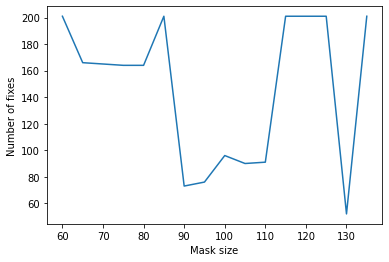

In [57]:
plt.plot(mask_sizes,scores)
plt.xlabel('Mask size')
plt.ylabel('Number of fixes')

In [58]:
pickle.dump(scorematrix,open('./scorematrix_mask_20.pkl','wb'))

## Fix by Fix images

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

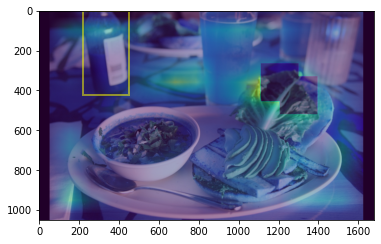

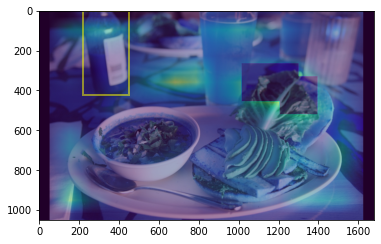

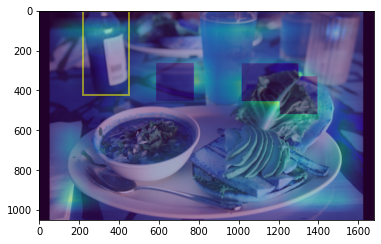

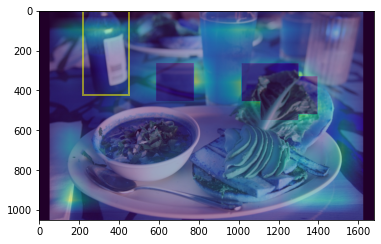

done with im 14.0 fixes


In [59]:

for i in tqdm(stimuli_ims.keys()):
        # i = stimuli_ims.keys()[m]
        num_ims = len(att_maps[i].keys())
        num_stims = len(stimuli_ims[i])
        num_targets = len(target_ims[i])
        size = target_ims['bottle'][0].T.shape[-2:]
        scorematrix [i] = np.ones(num_targets)
        posx[i] =dict()
        posy[i]= dict()
        c=0
        for j in tqdm(range(44,num_stims),leave=False):
            
            # att_map = attmaps[i]
            # for k in range(num_targets):
            c+=1
            posx[i][(j,j)]= []
            posy[i][(j,j)]= []

            # if j==0:
            #     salimg = np.multiply(att_map,total_mask)
            # else:
            #     chosenmask = masks[chosenfix]
            #     temp = np.multiply(salimg,(1-chosenmask))
            #     salimg = gray(temp)
            attmap = gray(cv2.resize(np.squeeze(att_maps[i][(j,j)]), size))
            bb = bboxes[i][j]
            salimg = attmap
            

            mask  = np.zeros_like(salimg)
            mask[bb[1]:bb[1]+bb[3],bb[0]:bb[0]+bb[2]]=1

            xx = np.arange(bb[1],bb[1]+bb[3],1)
            yy = np.arange(bb[0],bb[0]+bb[2],1)
            xv,yv = np.meshgrid(xx,yy,sparse=True)
            indx,indy = np.unravel_index(np.argmax(salimg),shape = salimg.shape)
            salimg  =gray(mask_fixation(salimg,indx,indy,size =95))
            posx[i][(j,j)].append(indx)
            posy[i][(j,j)].append(indy)
            while (mask[indx,indy]==0):
                indx_prev = indx
                indy_prev = indy
                indx,indy = np.unravel_index(np.argmax(salimg),shape = salimg.shape)
                if (indx,indy) == (indx_prev,indy_prev):  #To move it around if stuck in a loop (have to debug)
                    indx += random.randint(size[0]-indx_prev)
                    indy += random.randint(size[1]-indy_prev)
                salimg  = gray(mask_fixation(salimg,indx,indy,size=95))
                
                if scorematrix[i][c]<5 :
                    ax=plt.gca()
                    plt.imshow(target_ims[i][j])
                    plt.imshow(salimg,cmap='viridis',alpha=0.5)
                    rect = Rectangle((bb[0], bb[1]),bb[2],bb[3], 
                    alpha=0.5, edgecolor='yellow', facecolor='none', linewidth=2)
                    ax.add_patch(rect)
                    plt.pause(0.1)
                    
                

                # chosenfix = total_mask[indx,indy]
                posx[i][(j,j)].append(indx)
                posy[i][(j,j)].append(indy)
                
                scorematrix[i][c] +=1
                if scorematrix[i][c]>200:
                    break
            print(f"done with im {scorematrix[i][c]} fixes")
            scores.append(scorematrix[i][c])
            break
        break

Normal full run

In [60]:
for i in tqdm(stimuli_ims.keys()):
        
        num_ims = len(att_maps[i].keys())
        num_stims = len(stimuli_ims[i])
        num_targets = len(target_ims[i])
        size = target_ims['bottle'][0].T.shape[-2:]
        scorematrix [i] = np.ones(num_targets)
        posx[i] =dict()
        posy[i]= dict()
        c=0
        for j in tqdm(range(num_stims),leave=False):
            
            c+=1
            posx[i][(j,j)]= []
            posy[i][(j,j)]= []

            attmap = gray(cv2.resize(np.squeeze(att_maps[i][(j,j)]), size))
            bb = bboxes[i][j]
            salimg = attmap
        
            mask  = np.zeros_like(salimg)  #Masking ground truth region for identifying a fix immediately
            mask[bb[1]:bb[1]+bb[3],bb[0]:bb[0]+bb[2]]=1

            indx,indy = np.unravel_index(np.argmax(salimg),shape = salimg.shape)
            salimg  =gray(mask_fixation(salimg,indx,indy,size =95))

            posx[i][(j,j)].append(indx)
            posy[i][(j,j)].append(indy)
            
            while (mask[indx,indy]==0):
                indx_prev = indx
                indy_prev = indy
                indx,indy = np.unravel_index(np.argmax(salimg),shape = salimg.shape)
                if (indx,indy) == (indx_prev,indy_prev):  #To move it around if stuck in a loop (have to debug)
                    indx = random.randint(0,size[1]-1)
                    indy = random.randint(0,size[0]-1)
                salimg  = gray(mask_fixation(salimg,indx,indy,size=95))
                
                # if scorematrix[i][c]<5 :
                #     ax=plt.gca()
                #     plt.imshow(target_ims[i][j])
                #     plt.imshow(salimg,cmap='viridis',alpha=0.9)
                #     rect = Rectangle((bb[0], bb[1]),bb[2],bb[3], 
                #     alpha=0.5, edgecolor='yellow', facecolor='none', linewidth=2)
                #     ax.add_patch(rect)
                #     plt.pause(0.1)
                
                posx[i][(j,j)].append(indx)
                posy[i][(j,j)].append(indy)
                
                scorematrix[i][c] +=1
                if scorematrix[i][c]>200:  # If taking more than 400 fixations then stopping the search
                    break           
        

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

In [62]:
k=np.array([])
for _,i in scorematrix.items():
    k= np.concatenate([k,i])

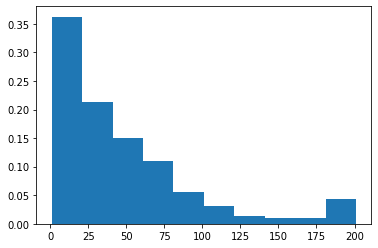

In [63]:
weights = np.ones_like(k) / len(k)

a,b,_= plt.hist(k,weights=weights)
 

## Modified Run

Modified run such that any pixel in the mask within the bounding box also counts as positive id

visual angle calculaition refer to  [this url](https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-021-87715-9/MediaObjects/41598_2021_87715_MOESM1_ESM.pdf), fovea visual angle = 2deg hence [(1650/54)*2] pixels is accurate mask fixation

In [75]:
scores =dict()
scorematrix= dict()

In [79]:
for i in tqdm(stimuli_ims.keys()):
        
        # num_ims = len(att_maps[i].keys())
        num_stims = len(stimuli_ims[i])
        num_targets = len(target_ims[i])
        size = target_ims['bottle'][0].T.shape[-2:]
        scorematrix [i] = np.zeros((num_stims,200))
        scores[i] = np.ones((num_stims,1))
        size_mask = 60
        # posx[i] =dict()
        # posy[i]= dict()
        
        for j in tqdm(range(num_stims),leave=False):
            flag=0
            trials = 1
            # posx[i][(j,j)]= []
            # posy[i][(j,j)]= []
              #fixation mask size
            attmap = gray(cv2.resize(np.squeeze(att_maps[i][(j,j)]), size))
            bb = bboxes[i][j]
            salimg = attmap
        
            mask  = np.zeros_like(salimg)  #Masking ground truth region for identifying a fix immediately
            mask[bb[1]:bb[1]+bb[3],bb[0]:bb[0]+bb[2]]=1

            indx,indy = np.unravel_index(np.argmax(salimg),shape = salimg.shape)
            
            salimg  =gray(mask_fixation(salimg,indx,indy,size =size_mask))
            fix_mask  = np.zeros_like(salimg)
            fix_mask[indx-size_mask:indx+size_mask,
                     indy-size_mask:indy+size_mask] = 1
            # posx[i][(j,j)].append(indx)
            # posy[i][(j,j)].append(indy)
            
            while (mask[indx,indy]==0 or np.any(cv2.bitwise_and(mask,fix_mask))==False):

                indx_prev = indx
                indy_prev = indy
                indx,indy = np.unravel_index(np.argmax(salimg),shape = salimg.shape)
                if (indx,indy) == (indx_prev,indy_prev):  #To move it around if stuck in a loop (have to debug)
                    indx = random.randint(0,size[1]-1)
                    indy = random.randint(0,size[0]-1)
                salimg  = gray(mask_fixation(salimg,indx,indy,size=size_mask))
                fix_mask=np.zeros_like(salimg)
                fix_mask[indx-size_mask:indx+size_mask,
                        indy-size_mask:indy+size_mask]=1
                # if scorematrix[i][j,5]==0 :
                #     ax=plt.gca()
                #     plt.imshow(target_ims[i][j])
                #     plt.imshow(salimg,cmap='viridis',alpha=0.9)
                #     rect = Rectangle((bb[0], bb[1]),bb[2],bb[3], 
                #     alpha=0.5, edgecolor='yellow', facecolor='none', linewidth=2)
                #     ax.add_patch(rect)
                #     plt.pause(0.1)
                # print(f'no. of fixes {trials}, score = {scores[i][j]}')
                # posx[i][(j,j)].append(indx)
                # posy[i][(j,j)].append(indy)
                scores[i][j] += 1
                trials += 1
                if trials > 199:
                    flag = 1  # If taking more than 200 fixations then stopping the search
                    break

            if flag:
                continue
            else:
                scorematrix[i][j, trials] += 1


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

In [51]:
def per_class_run(i,scorematrix,scores):
    # num_ims = len(att_maps[i].keys())
    num_stims = len(stimuli_ims[i])
    num_targets = len(target_ims[i])
    size = target_ims['bottle'][0].T.shape[-2:]
    scorematrix[i] = np.zeros((num_stims,200))
    scores[i] = np.ones((num_stims,1))
    # posx[i] =dict()
    # posy[i]= dict()
    c=0
    for j in range(num_stims):
        flag=0
        trials = 1
        # posx[i][(j,j)]= []
        # posy[i][(j,j)]= []
        size_mask = 60  #fixation mask size
        attmap = gray(cv2.resize(np.squeeze(att_maps[i][(j,j)]), size))
        bb = bboxes[i][j]
        salimg = attmap
    
        mask  = np.zeros_like(salimg)  #Masking ground truth region for identifying a fix immediately
        mask[bb[1]:bb[1]+bb[3],bb[0]:bb[0]+bb[2]]=1

        indx,indy = np.unravel_index(np.argmax(salimg),shape = salimg.shape)
        
        salimg  =gray(mask_fixation(salimg,indx,indy,size =size_mask))
        fix_mask  = np.zeros_like(salimg)
        fix_mask[indx-size_mask:indx+size_mask,
                    indy-size_mask:indy+size_mask] = 1
        # posx[i][(j,j)].append(indx)
        # posy[i][(j,j)].append(indy)
        
        while (mask[indx,indy]==0 or np.any(cv2.bitwise_and(mask,fix_mask))==False):

            indx_prev = indx
            indy_prev = indy
            indx,indy = np.unravel_index(np.argmax(salimg),shape = salimg.shape)
            if (indx,indy) == (indx_prev,indy_prev):  #To move it around if stuck in a loop (have to debug)
                indx = random.randint(0,size[1]-1)
                indy = random.randint(0,size[0]-1)
            salimg  = gray(mask_fixation(salimg,indx,indy,size=size_mask))
            fix_mask=np.zeros_like(salimg)
            fix_mask[indx-size_mask:indx+size_mask,
                    indy-size_mask:indy+size_mask]=1
            # if scorematrix[i][c,5]==0 :
            #     ax=plt.gca()
            #     plt.imshow(target_ims[i][j])
            #     plt.imshow(salimg,cmap='viridis',alpha=0.9)
            #     rect = Rectangle((bb[0], bb[1]),bb[2],bb[3], 
            #     alpha=0.5, edgecolor='yellow', facecolor='none', linewidth=2)
            #     ax.add_patch(rect)
            #     plt.pause(0.1)
            
            # posx[i][(j,j)].append(indx)
            # posy[i][(j,j)].append(indy)
            scores[i][c] += 1
            trials += 1
            if trials > 199: 
                flag=1 # If taking more than 200 fixations then stopping the search
                break
            
        if flag:
            continue    
        else :
            scorematrix[i][c, trials] += 1
        c += 1
        if(j%50 == 0 and j>0):
            print(f'done with {j} ims in {i}')
    

In [80]:
np.argmax(scorematrix['bottle'][0])

5

In [58]:
scorematrix['bottle'][0].shape

(200,)

## Cumulative Scanpath Histogram

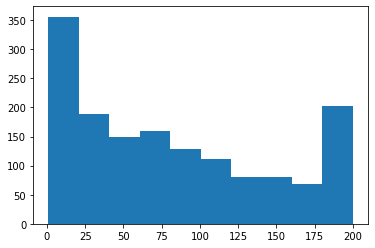

In [84]:
k = np.array([])
for _, i in scores.items():
    k = np.concatenate([k, i.squeeze()])
# weights = np.ones_like(k) / len(k)

a, b, _ = plt.hist(k)


In [86]:
pickle.dump(scorematrix,open('sc_mat_new.pkl','wb'))


In [99]:
pickle.dump(scores, open('sc_mat_new_raw.pkl', 'wb'))


In [87]:
scorematrix['bottle'].shape

(82, 200)

In [105]:
for i in scorematrix.keys():
    a=np.zeros((200,1))
    a+=np.expand_dims(scorematrix[i].sum(axis=0)/scorematrix[i].shape[0],axis=-1)

Text(0, 0.5, 'Probability of getting a fix')

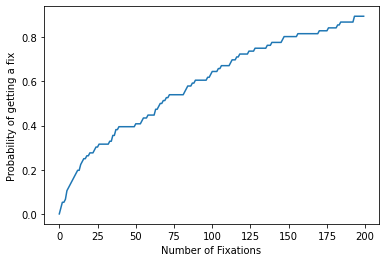

In [109]:
plt.plot(np.cumsum(a))
plt.xlabel('Number of Fixations')
plt.ylabel('Probability of getting a fix')


In [102]:
a


array([[-0.78158394, -0.4913047 ,  1.82147993],
       [-0.68506886,  1.47155349,  1.48509902]])

In [103]:
a.sum(axis=0)/a.shape[0]

array([-0.7333264 ,  0.4901244 ,  1.65328948])